<a href="https://colab.research.google.com/github/StoneMason495/cap-comp215/blob/main/Project1_6DegreesofBacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 1: 6 Degrees of Kevin Bacon**
####Name: Zach Mason

In [1]:
import json, requests
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx
from dataclasses import dataclass

In [ ]:
API_KEY = 'k_06muerbm'

url = f"https://imdb-api.com/en/API/Top250Movies/{API_KEY}"

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)  # recall json.loads for lab 1

results = data['items']

In [3]:
pprint(results)

[{'crew': 'Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
  'fullTitle': 'The Shawshank Redemption (1994)',
  'id': 'tt0111161',
  'imDbRating': '9.2',
  'imDbRatingCount': '2705914',
  'image': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX128_CR0,12,128,176_AL_.jpg',
  'rank': '1',
  'title': 'The Shawshank Redemption',
  'year': '1994'},
 {'crew': 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
  'fullTitle': 'The Godfather (1972)',
  'id': 'tt0068646',
  'imDbRating': '9.2',
  'imDbRatingCount': '1879021',
  'image': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UX128_CR0,12,128,176_AL_.jpg',
  'rank': '2',
  'title': 'The Godfather',
  'year': '1972'},
 {'crew': 'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
  'fullTitle': 'The Dark Knight (2008)',
  'id': 'tt0468569',
  'imDbRating': '9.0',
  'imDbRatin

In [4]:
top30results = [item for item in results if int(item['imDbRatingCount']) >= 1250000]
print(len(top30results))
all(int(item['imDbRatingCount'])>=1250000 for item in top30results)

30


True

The above code is the filter, as there is not enough computing power for me to do all 250 movies in this simulation, in addition to a limit on the number of API calls, so the list has been narrowed down to the number of movies with over 1.25 million IMDb reviews, which is exactly 30 movies

In [5]:
def getfullcrew(film_id):
  API_KEY = 'k_06muerbm'
  url = f'https://imdb-api.com/en/API/FullCast/{API_KEY}/{film_id}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)
  return data['actors']


def getfirst10(film_id):
  API_KEY = 'k_06muerbm'
  url = f'https://imdb-api.com/en/API/FullCast/{API_KEY}/{film_id}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)
  first10actors = data['actors'][:10]
  return first10actors

@dataclass
class Movie:
  crew: str
  fullTitle: str
  id: str
  imDbRating: str
  imDbRatingCount: str
  image: str
  rank: str
  title: str
  year: str

  def __str__(self):
    return f'{self.fullTitle}: \n{self.imDbRating}/10 on {self.imDbRatingCount} reviews. \n{self.crew}'
    
  @classmethod
  def build_movie(cls, input_data, **kwargs):
    crew = input_data['crew']
    fullTitle = input_data['fullTitle']
    id = input_data['id']
    imDbRating = input_data['imDbRating']
    imDbRatingCount = input_data['imDbRatingCount']
    image = input_data['image']
    rank = input_data['rank']
    title = input_data['title']
    year = input_data['year']
    return Movie(crew, fullTitle, id, imDbRating, imDbRatingCount, image, rank, title, year)

@dataclass
class Actor:
  id : str
  image : str
  name : str
  asCharacter : str
  def __str__(self):
    return f'{self.name} played {self.asCharacter}'
  @classmethod
  def build_actor(cls, input_data, **kwargs):
    id = input_data['id']
    image = input_data['image']
    name = input_data['name']
    asCharacter = input_data['asCharacter']
    return Actor(id, image, name, asCharacter)


# test instance of creating a movie object, getting the full crew, and creating two actor classes in this case for "The Godfather"
test_film = Movie.build_movie(top30results[1])
print(test_film)

test_full_crew = getfullcrew(test_film.id)
test_full_crew

test_tenactors = getfirst10(test_film.id)
test_tenactors

The Godfather (1972): 
9.2/10 on 1879021 reviews. 
Francis Ford Coppola (dir.), Marlon Brando, Al Pacino


[{'id': 'nm0000008',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTg3MDYyMDE5OF5BMl5BanBnXkFtZTcwNjgyNTEzNA@@._V1_Ratio1.2727_AL_.jpg',
  'name': 'Marlon Brando',
  'asCharacter': 'Don Vito Corleone'},
 {'id': 'nm0000199',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTQzMzg1ODAyNl5BMl5BanBnXkFtZTYwMjAxODQ1._V1_Ratio0.7273_AL_.jpg',
  'name': 'Al Pacino',
  'asCharacter': 'Michael Corleone'},
 {'id': 'nm0001001',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTI5NjkyNDQ3NV5BMl5BanBnXkFtZTcwNjY5NTQ0Mw@@._V1_Ratio0.7273_AL_.jpg',
  'name': 'James Caan',
  'asCharacter': 'Sonny Corleone'},
 {'id': 'nm0144710',
  'image': 'https://m.media-amazon.com/images/M/MV5BMjI2MzA3MjQ5N15BMl5BanBnXkFtZTcwMzY5NDYwOA@@._V1_Ratio0.7273_AL_.jpg',
  'name': 'Richard S. Castellano',
  'asCharacter': 'Clemenza (as Richard Castellano)'},
 {'id': 'nm0000380',
  'image': 'https://m.media-amazon.com/images/M/MV5BMjk1MjA2Mjc2MF5BMl5BanBnXkFtZTcwOTE4MTUwMg@@._V1_Ratio0.7273_AL_.jpg',
  'name'

In [6]:
test_ten = test_full_crew[:10]
G = nx.Graph()
for i in range(len(test_ten)):
  G.add_node(test_ten[i]['name'])
list(G.nodes())

['Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Richard S. Castellano',
 'Robert Duvall',
 'Sterling Hayden',
 'John Marley',
 'Richard Conte',
 'Al Lettieri',
 'Diane Keaton']

In [ ]:
for i in list(G.nodes()):
  for j in list(G.nodes()):
    if j != i  and (i,j) or (j,i) not in list(G.edges):
      G.add_edge(i,j)
assert ('Conrad Yama', 'Marlon Brando') not in list(G.edges())
list(G.edges())

In [ ]:
f = plt.figure()
nx.draw_circular(G,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

In [15]:
i = top30results[0]
currentfilm = Movie.build_movie(i)
# print(currentfilm)
crew = getfirst10(currentfilm.id)
  # for j in crew:
  #   G.add_node(j['name'])

  # [(a,b) for a,b in crew]
crew

[{'id': 'nm0000209',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTI1OTYxNzAxOF5BMl5BanBnXkFtZTYwNTE5ODI4._V1_Ratio0.7727_AL_.jpg',
  'name': 'Tim Robbins',
  'asCharacter': 'Andy Dufresne'},
 {'id': 'nm0000151',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTc0MDMyMzI2OF5BMl5BanBnXkFtZTcwMzM2OTk1MQ@@._V1_Ratio0.7273_AL_.jpg',
  'name': 'Morgan Freeman',
  'asCharacter': "Ellis Boyd 'Red' Redding"},
 {'id': 'nm0348409',
  'image': 'https://m.media-amazon.com/images/M/MV5BMjUyZDQ0NjktZmM5ZS00NzcxLTliMWYtNWUxNDcyMmExZjU0XkEyXkFqcGdeQXVyMTE1MjA4NzM@._V1_Ratio0.7727_AL_.jpg',
  'name': 'Bob Gunton',
  'asCharacter': 'Warden Norton'},
 {'id': 'nm0006669',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTA1NjU3NDg1MTheQTJeQWpwZ15BbWU2MDI4OTcxMw@@._V1_Ratio0.8182_AL_.jpg',
  'name': 'William Sadler',
  'asCharacter': 'Heywood'},
 {'id': 'nm0000317',
  'image': 'https://m.media-amazon.com/images/M/MV5BMTUxODY3NjAzMF5BMl5BanBnXkFtZTcwMTQ5MjYwNg@@._V1_Ratio0.7273_AL_.jpg',
  

In [ ]:
set(G.nodes())
list(G.edges())

In [12]:
def create_connections(G):
  for i in list(G.nodes()):
    for j in list(G.nodes()):
      if j != i  and (i,j) or (j,i) not in list(G.edges):
        G.add_edge(i,j)
  return G

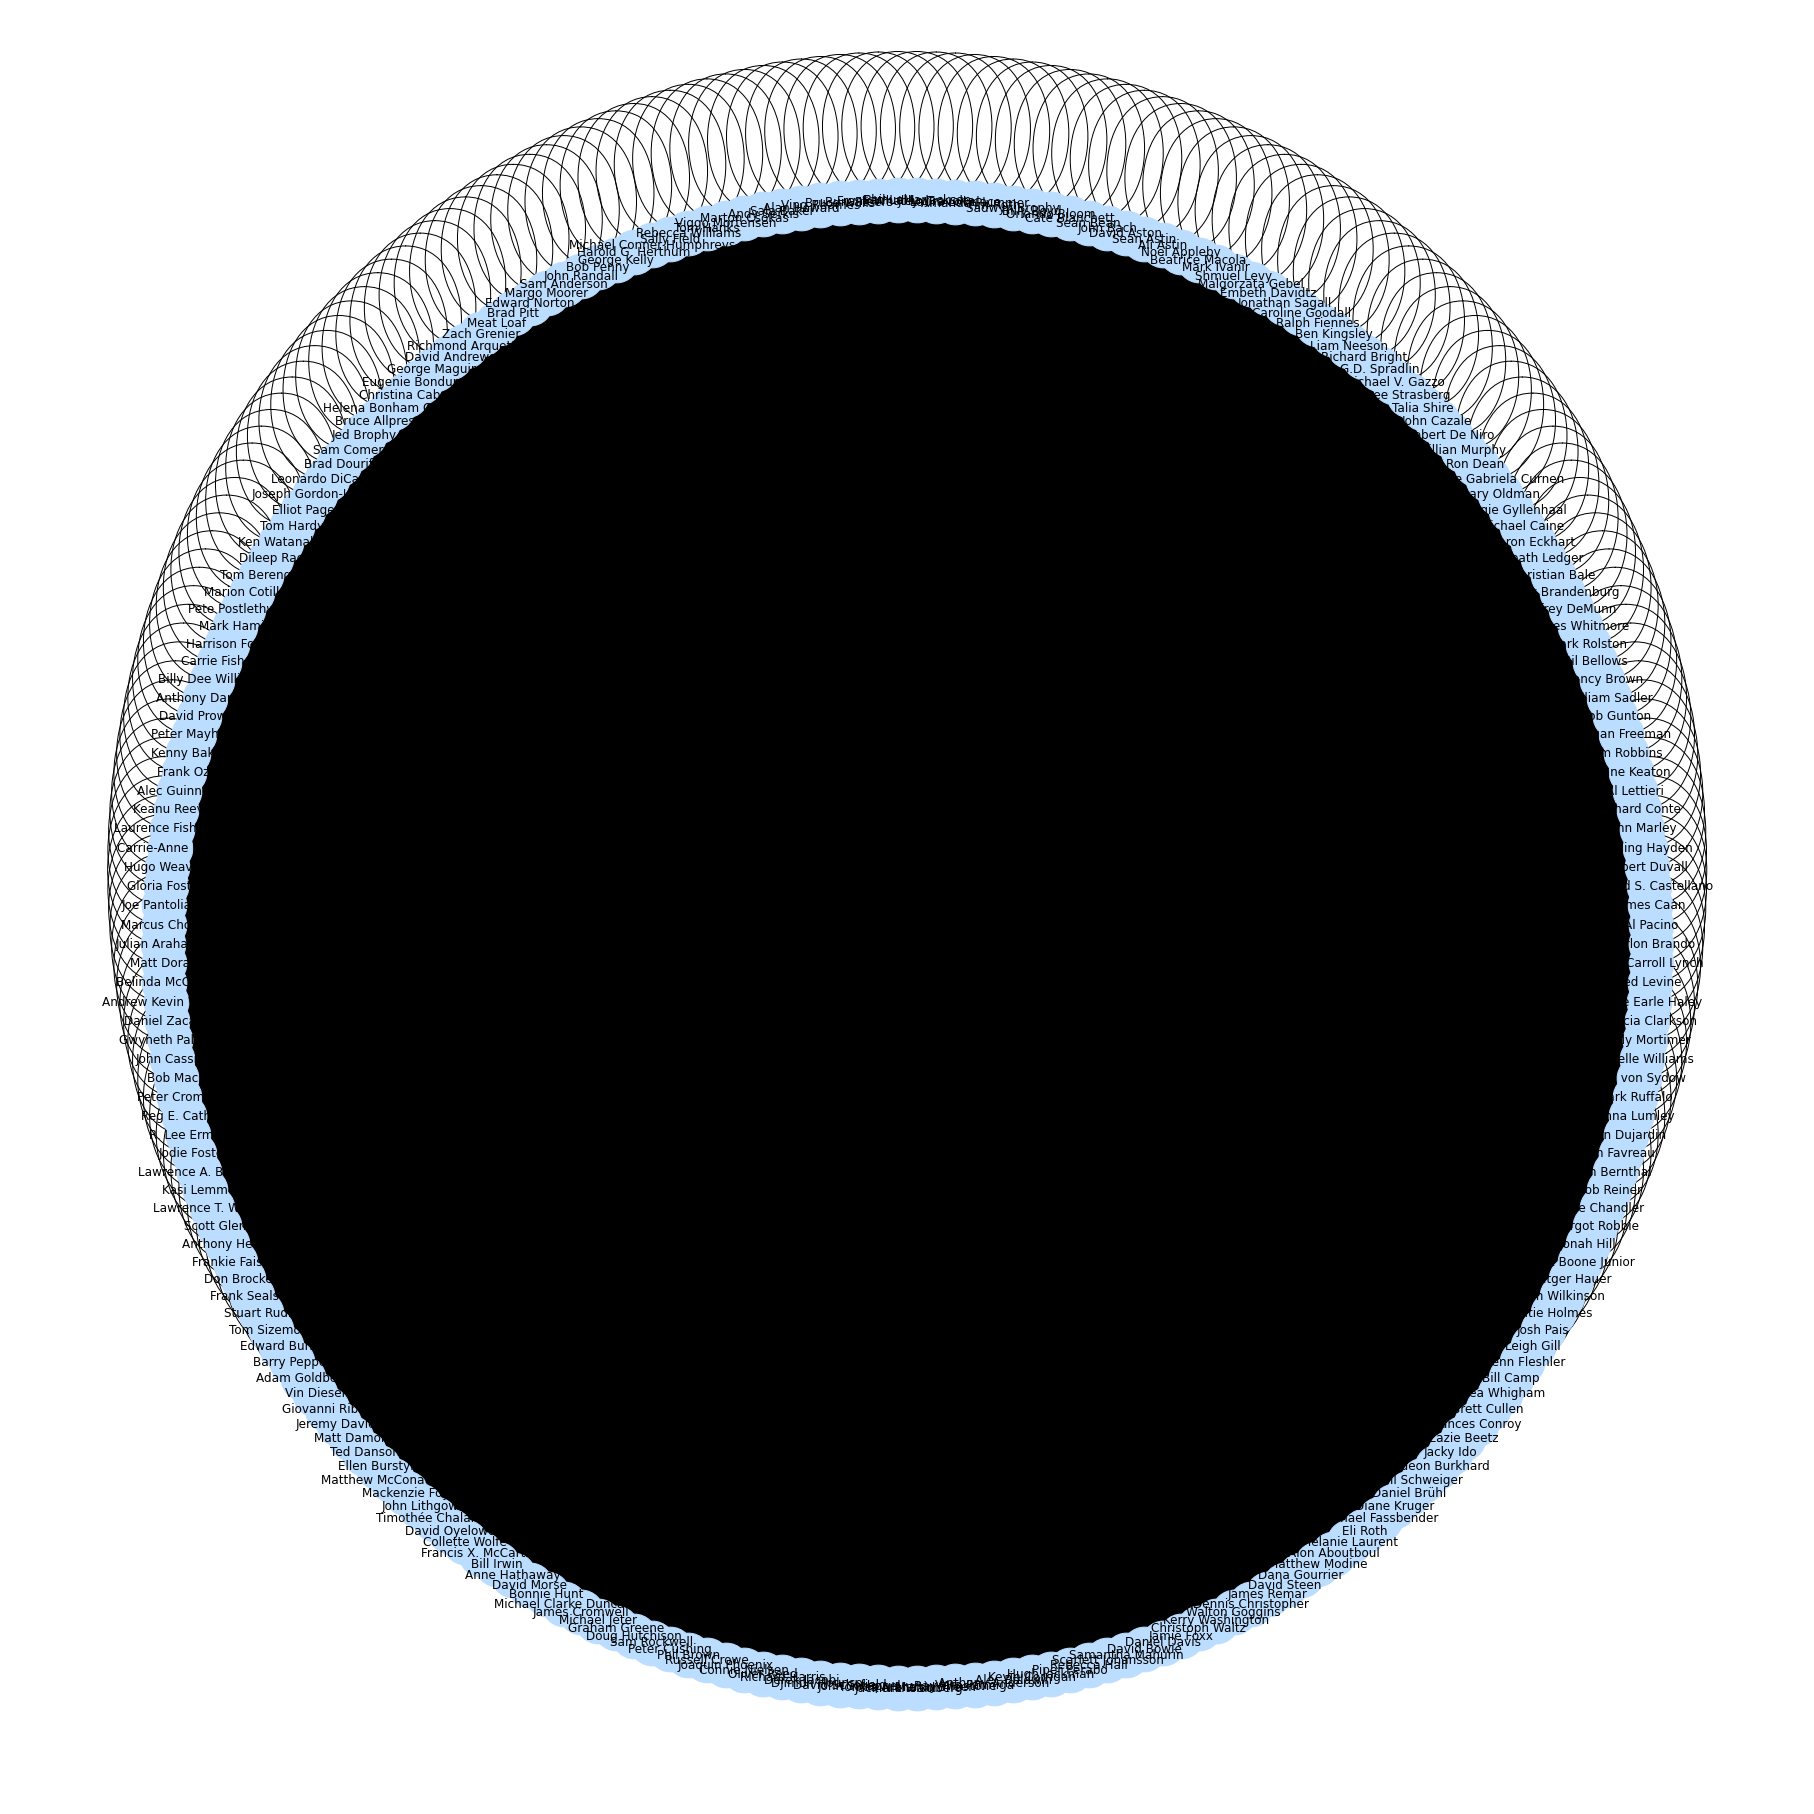

In [11]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(25)
nx.draw_circular(G,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()